In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import pandas_datareader.data as web
%matplotlib inline

In [2]:
start = datetime.datetime(2012,1,3)
end = datetime.datetime(2019,11,7)

In [3]:
apple = web.DataReader('AAPL', 'yahoo', start, end)
cisco = web.DataReader('CSCO','yahoo',start, end)
ibm = web.DataReader('IBM','yahoo', start, end)
amazon = web.DataReader('AMZN','yahoo', start, end)

In [4]:
stocks = pd.concat([apple['Close'],cisco['Close'],ibm['Close'],amazon['Close']],axis=1)

In [5]:
stocks.columns = ['apple','cisco','ibm','amazon']

In [7]:
stocks.head()

,apple,cisco,ibm,amazon
Date,,,,
2012-01-03,58.747143,18.629999,186.300003,179.029999
2012-01-04,59.062859,18.990000,185.539993,177.509995
2012-01-05,59.718571,18.920000,184.660004,177.610001
2012-01-06,60.342857,18.850000,182.539993,182.610001
2012-01-09,60.247143,18.969999,181.589996,178.559998


In [8]:
stocks.pct_change(1).corr()

,apple,cisco,ibm,amazon
apple,1.000000,0.385683,0.330840,0.358650
cisco,0.385683,1.000000,0.447015,0.367445
ibm,0.330840,0.447015,1.000000,0.298161
amazon,0.358650,0.367445,0.298161,1.000000


In [21]:
log_return = np.log(stocks/stocks.shift(1))

In [22]:
log_return.head()

,apple,cisco,ibm,amazon
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


In [12]:
plt.style.use('dark_background')

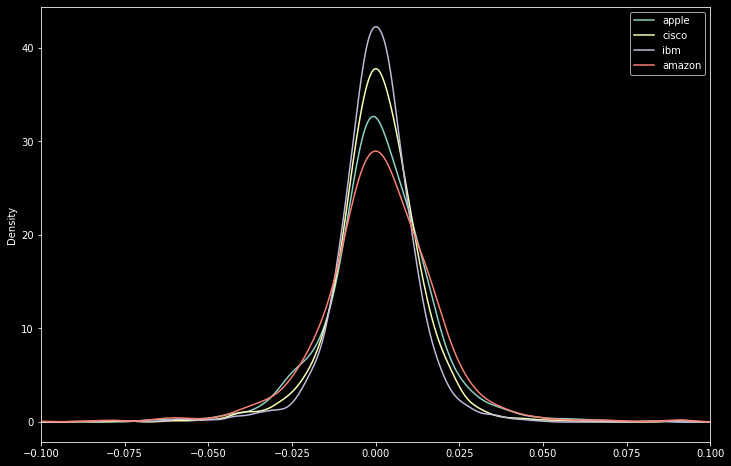

In [13]:
log_return.plot(kind='kde',figsize=(12,8))
plt.xlim(xmax=0.1,xmin=-0.1);

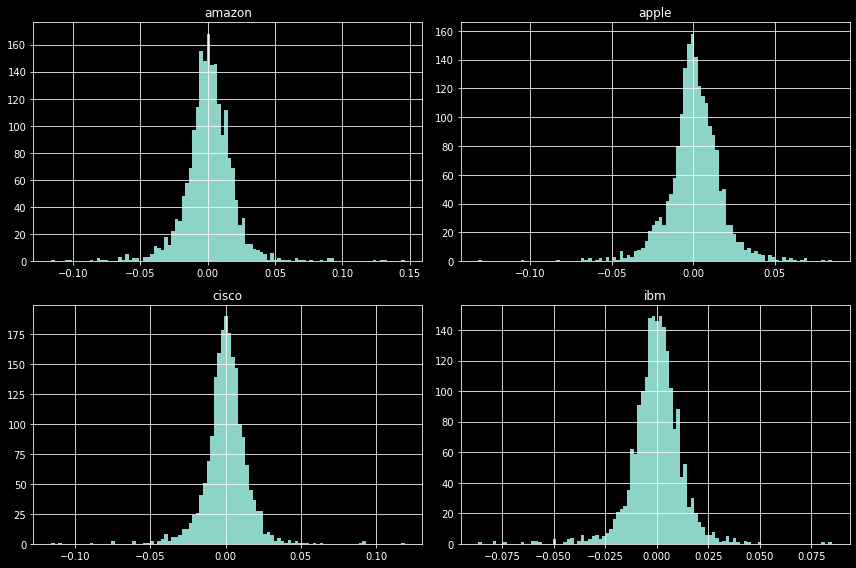

In [74]:
log_return.hist(bins=100,figsize=(12,8))
plt.tight_layout();

In [14]:
np.random.seed(101)

num_ports = 5000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    all_weights[ind,:] = weights
    
    #Expected return array
    ret_arr[ind] = np.sum( (log_return.mean()*weights)*252 )
    
    #Volatily array
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252,weights)))
    
    #Sharpe ration array
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]
    



In [24]:
weights1 = np.array([0.32252283, 0.15277098, 0.00198024, 0.52272595])
volatility = np.sqrt(np.dot(weights1.T,np.dot(log_return.cov()*252, weights1)))
volatility

0.21856717289986274

In [26]:
np.dot(weights1,np.dot(log_return.cov()*252, weights1))

0.047771609069438496

In [17]:
all_weights[2434,:]

array([0.32252283, 0.15277098, 0.00198024, 0.52272595])

In [18]:
max_sr_ret = ret_arr[2434]
max_sr_vol = vol_arr[2434]

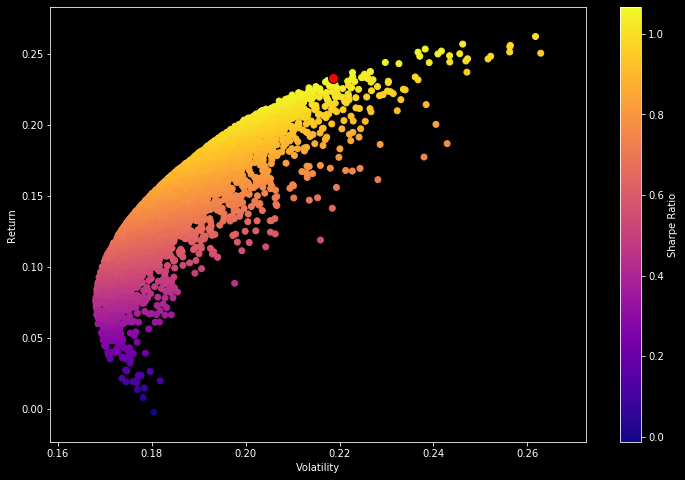

In [19]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=100,edgecolors='black');